- import Pacakges

In [1]:
import pandas as pd


-- load the data

In [2]:
data = pd.read_csv('./calories.csv')

In [3]:
data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
data_1 = pd.read_csv('./exercise.csv')
data_1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


- making them into one particular dataset

In [5]:
df= pd.merge(data_1,data, on ='User_ID')

In [7]:
df = df.reset_index()

In [8]:
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


-- checking the Quality of the data

In [9]:
df.isnull().sum()

index         0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
df = df.drop(['User_ID'],axis = 1)

In [11]:
df.head()

,index,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
df['Gender'] = df['Gender'].map({'male':0,'female':1}).astype(int)

In [13]:
df.head()

,index,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
import matplotlib.pyplot as plt


index


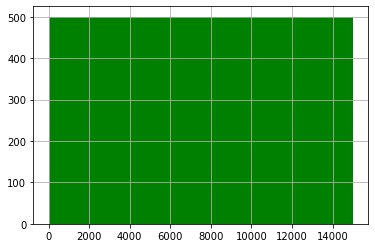

Age


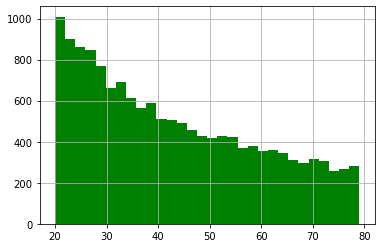

Height


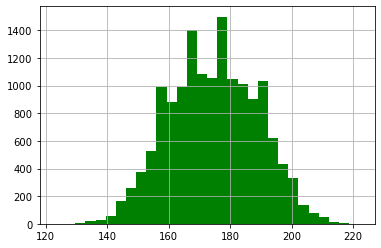

Weight


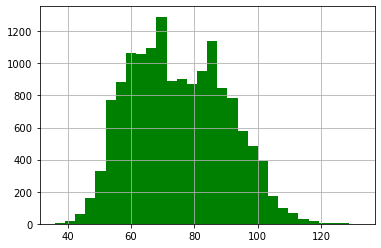

Duration


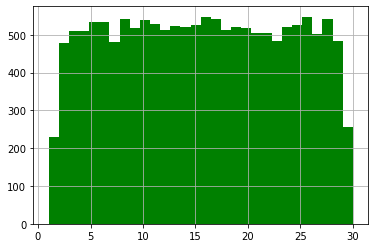

Heart_Rate


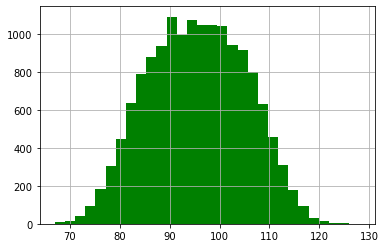

Body_Temp


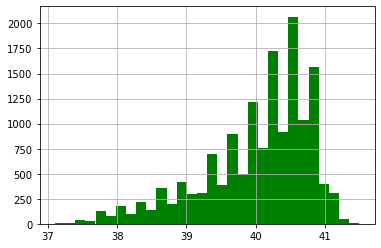

In [16]:
for i in df.columns:
    if i == 'Gender' or i =='Calories':
        pass
    else:
        print(i)
        df[i].hist(bins = 30,color ='g')
        plt.show()

- side by side distribution

In [17]:
df.columns

Index(['index', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import seaborn as sns

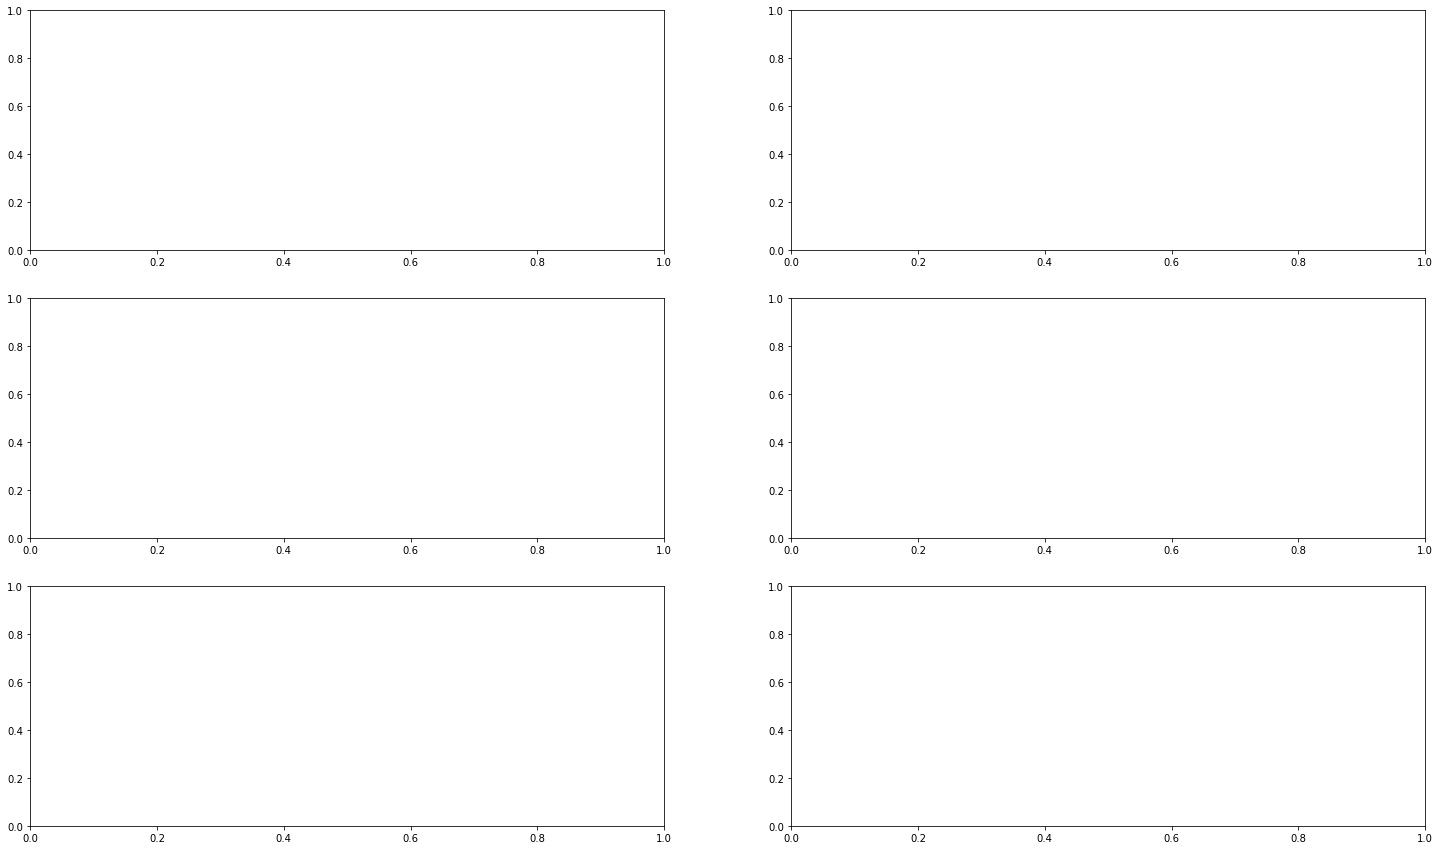

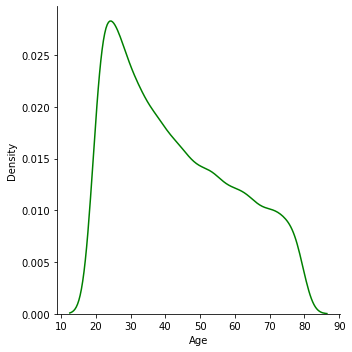

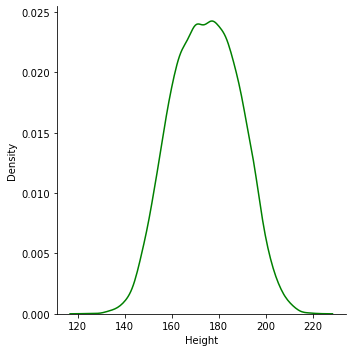

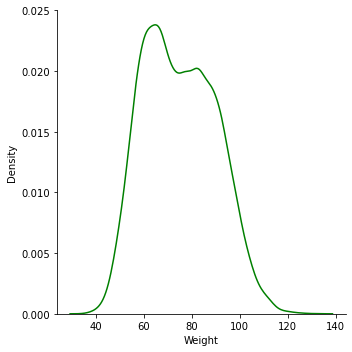

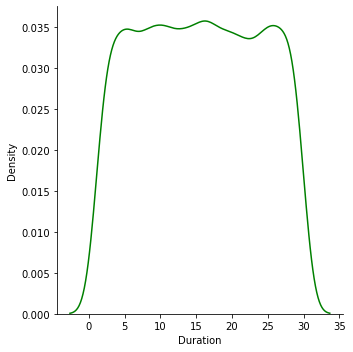

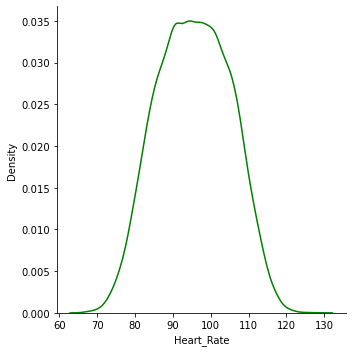

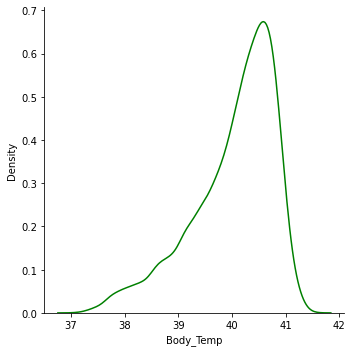

In [23]:
important = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', ]

fig , ax =plt.subplots(3,2 , figsize =(25,15))
for i,subplot in zip(important, ax.flatten()):
    sns.displot(df[i],ax = subplot ,color ='g',kind ='kde')
    


index


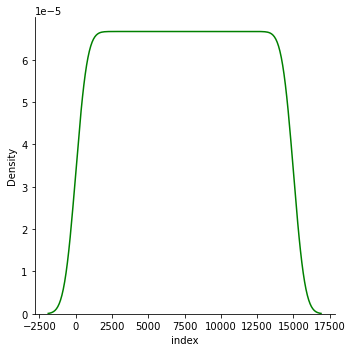

Age


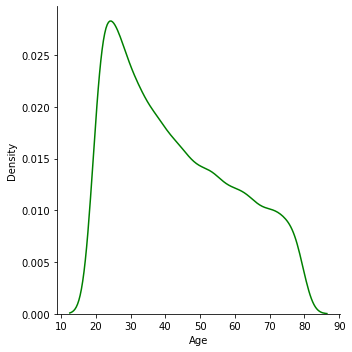

Height


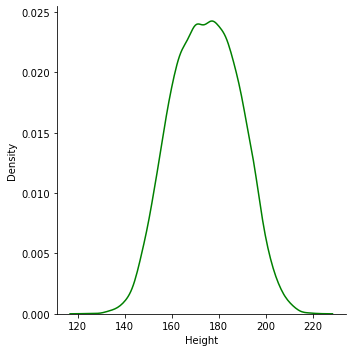

Weight


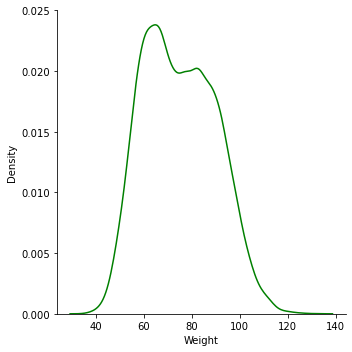

Duration


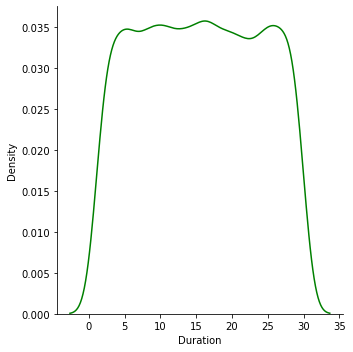

Heart_Rate


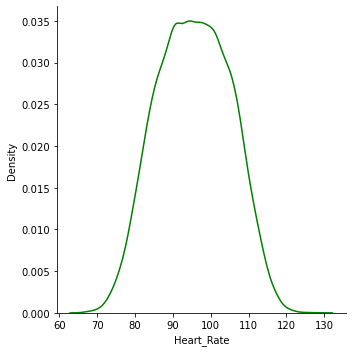

Body_Temp


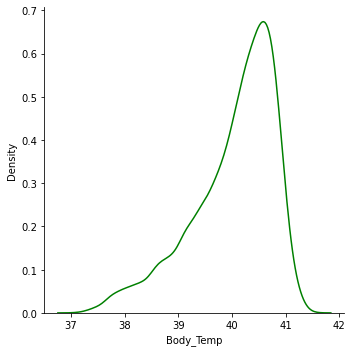

In [26]:
for i in df.columns:
    if i == 'Gender' or i =='Calories':
        pass
    else:
        print(i)
        sns.displot(df[i],color ='g',kind='kde')
        plt.show()

- scaling 
- variable transformation

- split the data

In [27]:
x =df.iloc[:,:-1]
y =df.iloc[:, -1]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

- model_development

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
reg.coef_

array([-1.94654431e-06,  1.37768667e+00,  4.99550341e-01, -1.79848289e-01,
        2.97707756e-01,  6.61988597e+00,  1.99368802e+00, -1.69480261e+01])

In [34]:
reg.intercept_

461.59418526530476

- Train accuracy

In [42]:
y_train_pred = reg.predict(x_train)
from sklearn.metrics  import r2_score

In [43]:
r2_score(y_train,y_train_pred)

0.9676004388255135

In [44]:
y_test_pred = reg.predict(x_test)
from sklearn.metrics  import r2_score
r2_score(y_test,y_test_pred)

0.9663705633185191

- saving model --> pickle means saving the data into binary format

In [45]:
import pickle 

In [46]:
with open('./calories.pkl', 'wb') as f:
    pickle.dump(reg, f)

## Now pickle file is your model